In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

# Import Data

In [13]:
data1=pd.read_excel("D:/Excel/Ecom.xlsx")
data1.head(3) # Importing data and looking for only 3 upper values

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28


In [16]:
data1.tail(3) # looking for only 3 bottom values

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


# Find Missing values

In [17]:
data1.shape # look for total rows and coloumns

(5630, 20)

In [20]:
data1.isnull().sum() # to find missing value in data 

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Fill Missing Value

In [19]:
#fill missing value in tenure coloumn
data1['Tenure'].fillna(data1['Tenure'].mean(), inplace=True)

#fill missing value in warehouseto home coloumn
data1['WarehouseToHome'].fillna(data1['WarehouseToHome'].mean(), inplace=True) 

#fill missing value in HourSpendOnApp home coloumn
data1['HourSpendOnApp'].fillna(data1['HourSpendOnApp'].mean(), inplace=True) 

#fill missing value in OrderAmountHikeFromlastYear home coloumn
data1['OrderAmountHikeFromlastYear'].fillna(data1['OrderAmountHikeFromlastYear'].mean(), inplace=True)

#fill missing value in CouponUsed home coloumn
data1['CouponUsed'].fillna(data1['CouponUsed'].mean(), inplace=True)

#fill missing value in OrderCount home coloumn
data1['OrderCount'].fillna(data1['OrderCount'].mean(), inplace=True)


#fill missing value in DaySinceLastOrder home coloumn
data1['DaySinceLastOrder'].fillna(data1['DaySinceLastOrder'].mean(), inplace=True)

# Preffered devices

In [21]:
data1['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

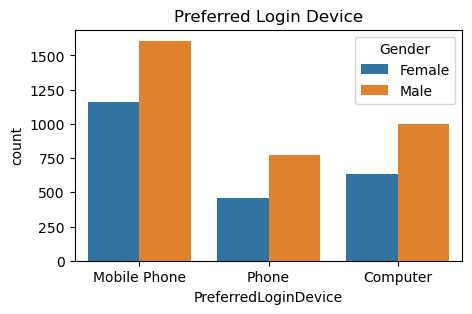

In [40]:
plt.figure(figsize=(5,3))
sns.countplot(x="PreferredLoginDevice", hue ="Gender", data=data1)
plt.title("Preferred Login Device")
plt.savefig("PreferredLoginDevice.jpg")
plt.show()

# Analysis On payment method

### Replaced duplicates value

In [22]:
data1["PreferredPaymentMode"].replace({"CC": "Cash On Delivery", "COD": "Cash On Delivery"}, inplace=True)
data1["PreferredPaymentMode"].replace({"Cash on Delivery": "Cash On Delivery"}, inplace= True)

In [23]:
data1['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
Cash On Delivery     787
E wallet             614
UPI                  414
Name: count, dtype: int64

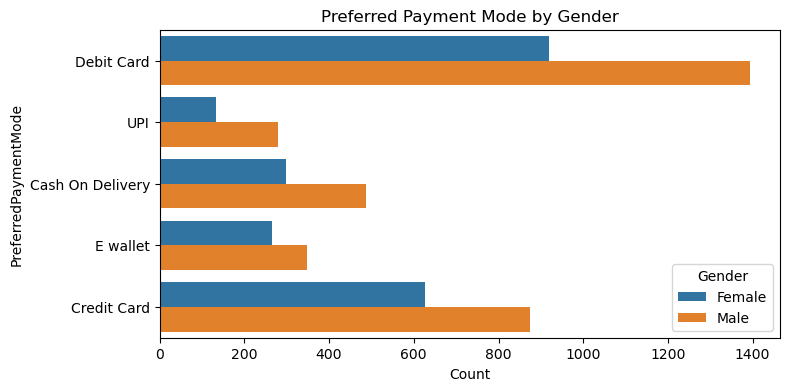

In [87]:
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
sns.countplot(y="PreferredPaymentMode",hue = "Gender" , data=data1)
plt.title("Preferred Payment Mode by Gender")
plt.xlabel("Count")
plt.ylabel("PreferredPaymentMode")
plt.show()

# Gender Based Analysis

In [70]:
data1['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

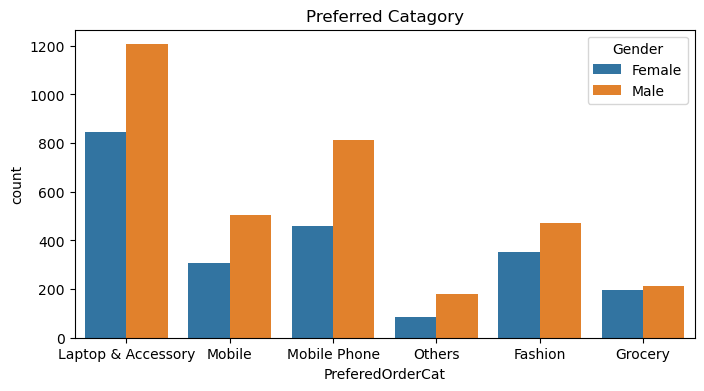

In [61]:

plt.figure(figsize=(8,4))
sns.countplot(x= "PreferedOrderCat", hue="Gender" , data= data1)
plt.title("Preferred Catagory")
plt.show()

# Satisfaction Score based on  Gender

In [72]:
data1["SatisfactionScore"].value_counts()

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

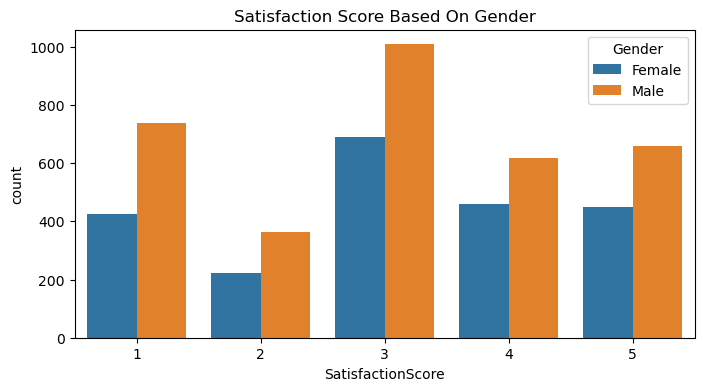

In [80]:
plt.figure(figsize=(8,4))
sns.countplot(x="SatisfactionScore", hue="Gender", data= data1)
plt.title("Satisfaction Score Based On Gender")
plt.show()

# Order catagory based on Marital status

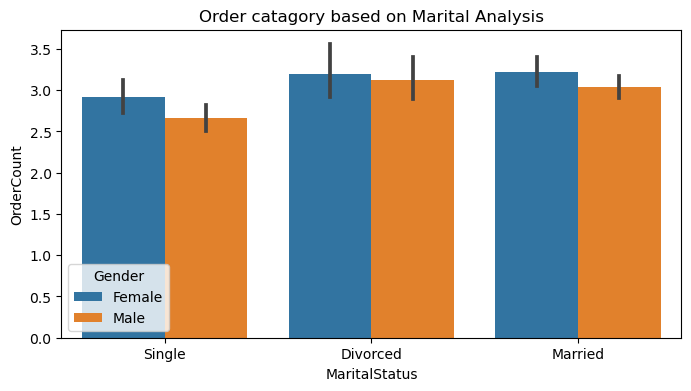

In [101]:
plt.figure(figsize=(8,4))
sns.barplot(x='MaritalStatus',y='OrderCount', hue = 'Gender', data=data1)
plt.title('Order catagory based on Marital Analysis')
plt.show()

# Conclusion

In [ ]:
# Data imported from the kaggle and first i did EDA to handle all the duplicate and missing data after cleaning and handling missing data 
# i go forward toward the data analysis, At first i did analysis on preferred login devices based on gender and then i did analysis
# on  payment method which is used by most of the customer, also with that i get insight on gender to analyze which gender is using which 
# payment method after that focused on the order catagory which is more used by the customer